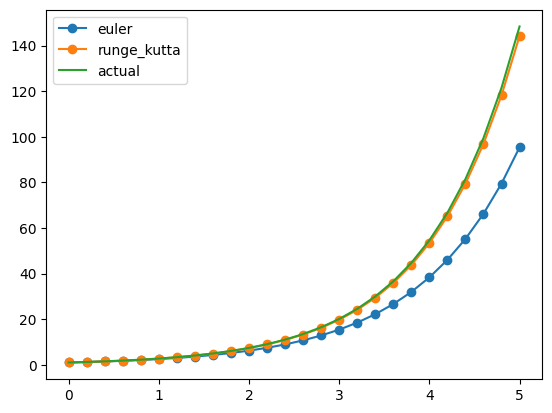

In [ ]:
from simpleeval import simple_eval
from functools import reduce
import math
import matplotlib.pyplot as plt
from euler import generate_points, eulers_method, second_order_runge_kutta

# the differential equation takes its arguments as an array
# so that we can handle higher orders;
# x, y, y', y'', etc come in that order in the array
# This is the equation for Ce^x
#y' = y
def diff_equation(args):
    x = args [0]
    y = args[1]
    return y 

# compare euler with runge kutta and optionally, the actual equation
def compare(dif, init, step, duration, eq=None):
    e_points = generate_points(dif, eulers_method, init, step, duration)
    x_e = list(map(lambda p: p[0], e_points))
    y_e = list(map(lambda p: p[1], e_points))
    plt.plot(x_e, y_e, '-o', label="euler")
    r_points = generate_points(dif, second_order_runge_kutta, init, step, duration)
    x_r = list(map(lambda p: p[0], r_points))
    y_r = list(map(lambda p: p[1], r_points))
    plt.plot(x_r, y_r, '-o', label="runge_kutta")
    if eq is not None:
        x_p = list((step*x for x in range(int(duration / step) + 1)))
        y_p = list(map(eq, x_p))
        plt.plot(x_p, y_p, label="actual")
    
    plt.legend()
    plt.show()

compare(diff_equation, [0, 1], 0.2, 5, eq=lambda x: math.e ** x,)

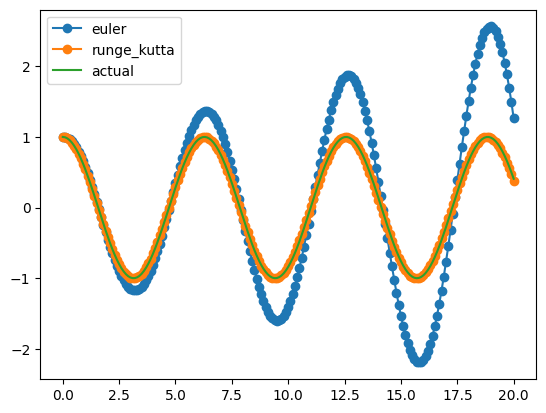

[0.3140000000000002, 0.9511057038088662, -0.30886556988557246, -0.9511057038088662]
0.9510565162951535


In [33]:
#Simple differential equation for cosine is
# y'' = -y
def cos_diff(args):
    return -1*args[1]

compare(cos_diff, [0, 1, 0], 0.1, 20, eq=math.cos)
cos_points = generate_points(cos_diff, second_order_runge_kutta, [0, 1, 0], 0.001, math.pi/10)
print(cos_points[-1])
print(math.cos(math.pi/10))


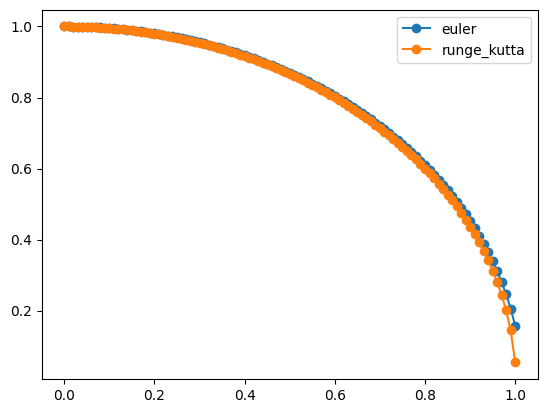

In [34]:
def circle(args):
    x = args[0]
    y = args[1]
    return -x/y
dif = circle
init = [0,1]
step = 0.01
duration = 1
e_points = generate_points(dif, eulers_method, init, step, duration)
x_e = list(map(lambda p: p[0], e_points))
y_e = list(map(lambda p: p[1], e_points))
plt.plot(x_e, y_e, '-o', label="euler")
r_points = generate_points(dif, second_order_runge_kutta, init, step, duration)
x_r = list(map(lambda p: p[0], r_points))
y_r = list(map(lambda p: p[1], r_points))
plt.plot(x_r, y_r, '-o', label="runge_kutta")

plt.legend()

plt.savefig("sad_circle.png", dpi=300, bbox_inches='tight')
plt.show()


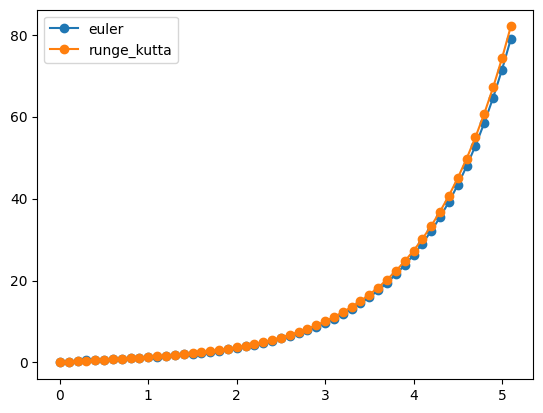

In [20]:
def prob_1(args):
    x = args[0]
    y = args[1]
    yp = args[2]
    return 4*math.e**x -3*y -4*yp

compare(prob_1, [0, 0, 2], 0.1, 5)

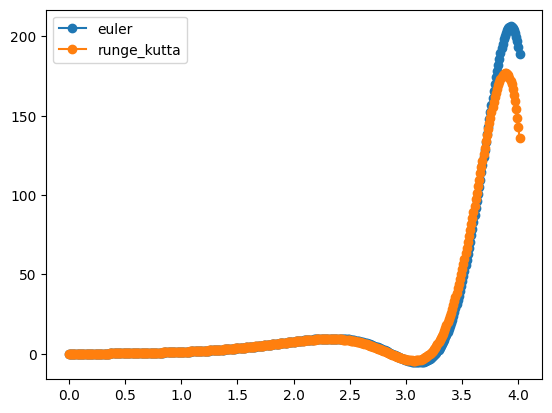

In [21]:
def prob_2(args):
    x = args[0]
    y = args[1]
    yp = args[2]
    return (math.e**(2*x) - 4*x**2*y + 3*x*yp)/2

compare(prob_2, [0, 0, 0.5], 0.01, 4)

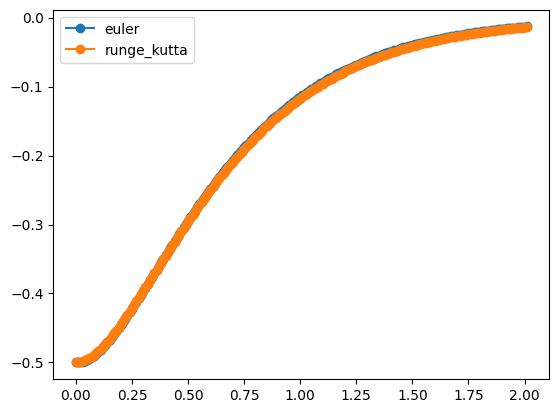

In [22]:
def prob_3(args):
    x = args[0]
    y = args[1]
    yp = args[2]
    return math.e**(-3*x) - 6*y - 5*yp

compare(prob_3, [0, -0.5, 0], 0.01, 2)



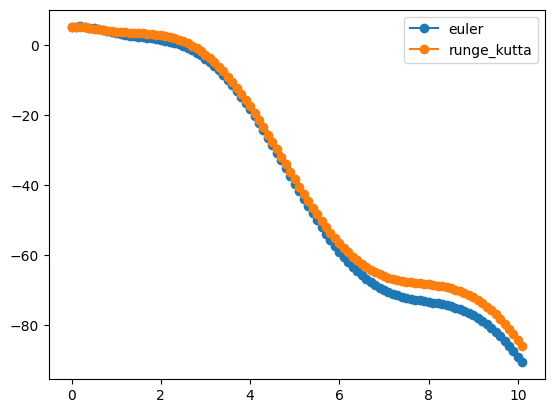

In [23]:
def prob_4(args):
    x = args[0]
    y = args[1]
    yp = args[2]
    return 10*math.cos(x) - 5*math.e**(-2*x)*y - 2*math.e**(-x)

compare(prob_4, [0, 5, 2], 0.1, 10)

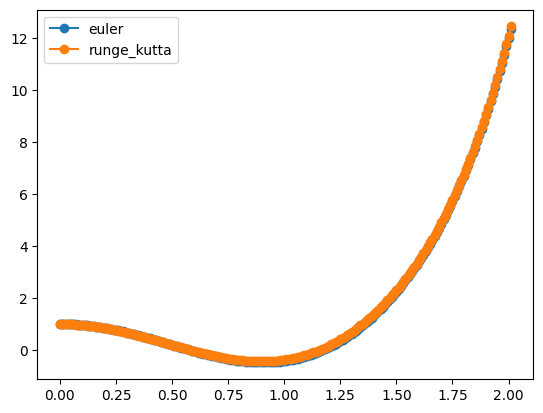

In [24]:
def prob_5(args):
    x = args[0]
    y = args[1]
    yp = args[2]
    return math.cosh(3*x) - 9*y
    
compare(prob_5, [0, 1, 0], 0.01, 2)


In [25]:
print(*(0.1 for _ in range(int(5 / 0.1))))

0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1


In [26]:
math.cos(math.pi/10)*10**20

9.510565162951536e+19

In [75]:
def cos_series(x, k, n):
    vals = map(lambda n: (-1)**n*(k*x)**(2*n)/math.factorial(2*n), range(n + 1))
    return reduce(
    lambda x, y: x+y,
    vals
    )
def sin_series(x, k, n):
    vals = map(lambda n: (-1)**n*(k*x)**(2*n+1)/math.factorial(2*n+1), range(n + 1))
    return reduce(
    lambda x, y: x+y,
    vals
    )
# print(math.cos(math.pi/10))
# print(cos_series(math.pi/10, 1, 6))
# print(math.sin(math.pi/10))
print(sin_series(math.pi/10, 1, 6))
print(cos_series(math.pi/10, 30, 6)**2 + sin_series(math.pi/10, 3, 6)**2)


0.30901699437494745
127824.02261032691
